In [1]:
# imports

import os
import sys
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
# read_dataset

df = pd.read_csv('./Data/raw/VETUSDT.csv')
df.head()

,event_time,open,close,high,low,volume
0,1643214300000,0.05606,0.05611,0.05611,0.05605,213878.1
1,1643214360000,0.05612,0.05617,0.05619,0.05608,242867.6
2,1643214420000,0.05617,0.05613,0.05618,0.05609,393583.3
3,1643214480000,0.05613,0.05622,0.05624,0.05612,265728.0
4,1643214540000,0.05620,0.05613,0.05620,0.05613,134964.5


C:\Users\jonas\AppData\Local\Temp\ipykernel_684224\2951880604.py:23: UserWarning: Legend does not support handles for AxesSubplot instances.
A proxy artist may be used instead.
See: https://matplotlib.org/stable/tutorials/intermediate/legend_guide.html#controlling-the-legend-entries
  ax1.legend(handles=handles)


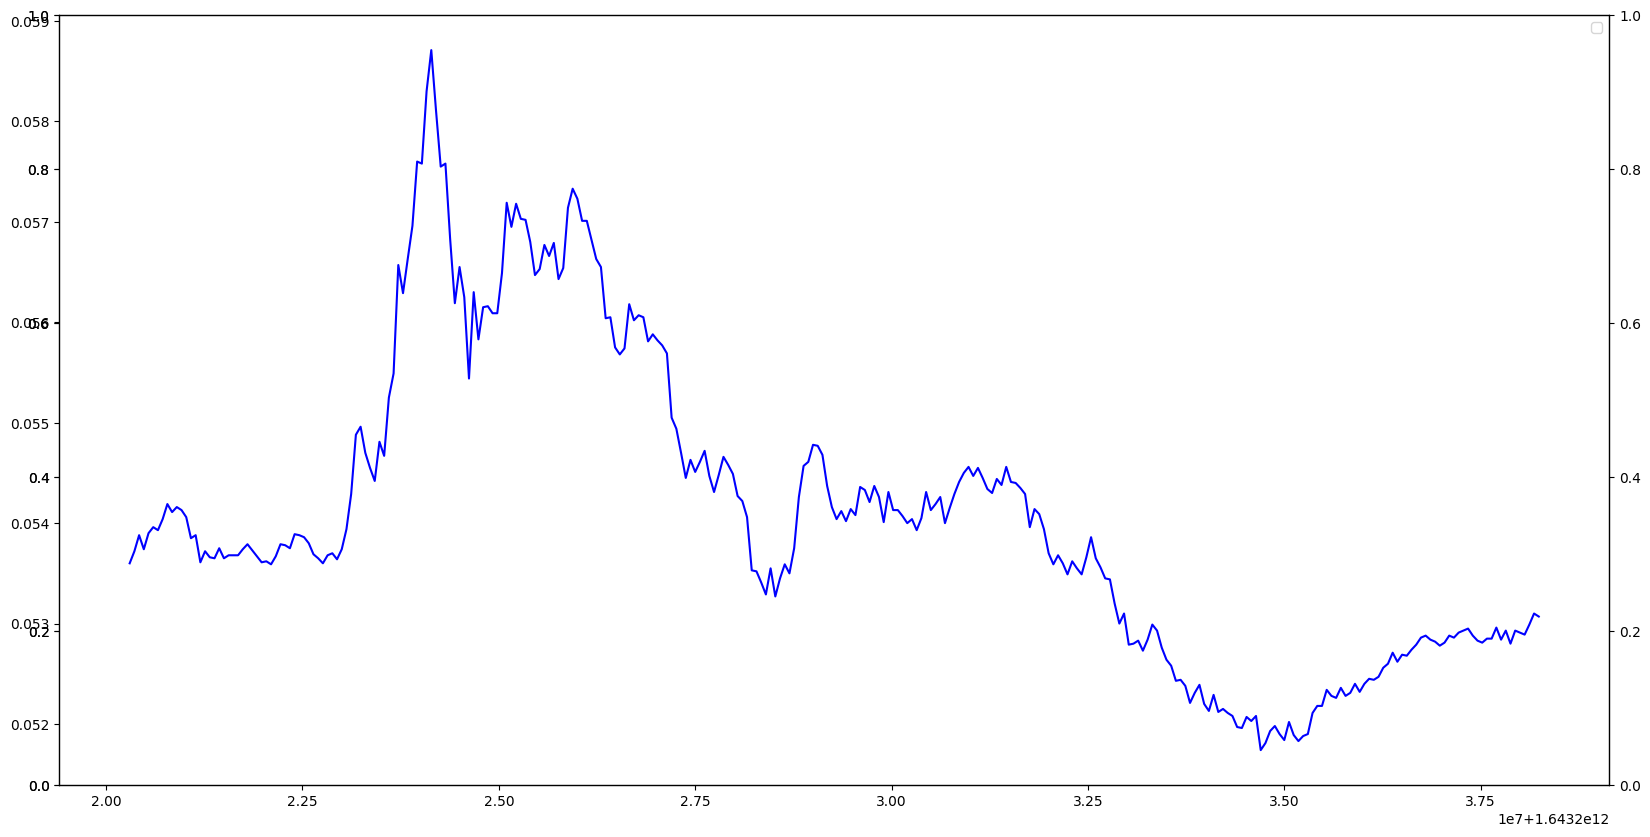

In [3]:
# plot dataset using matplotlib where event_time is x-axis and price is y-axis
short = df.iloc[100:400]
# create figure
fig = plt.figure(figsize=(20, 10))

# add subplot and a twinaxis
ax1 = fig.add_subplot(111)
ax2 = ax1.twinx()
ax3 = ax2.twinx()
ax4 = ax3.twinx()

handles = [ax1, ax2, ax3, ax4]



ax1.plot(short['event_time'], short['close'], color='blue')
# ax1.plot(short['event_time'], short['bb_upper'], color='red')
# ax1.plot(short['event_time'], short['bb_middle'], color='yellow')
# ax1.plot(short['event_time'], short['bb_lower'], color='green')



ax1.legend(handles=handles)

plt.show()


In [4]:
import datetime

def check_timestamps(timestamps):
    wrong_timestamps = []
    for i in range(2, len(timestamps)):
        time_diff = timestamps[i] - timestamps[i-1]

        if time_diff != 60000:
            print(f"\n")
            print(f"----------------------------")
            print(f"Time difference is {time_diff}, {timestamps[i+1] - timestamps[i]}")
            print(f"----------------------------\n")
            print(f"\n")
            wrong_timestamps.append(timestamps[i])
        # if time_diff != datetime.timedelta(minutes=1):
        #     wrong_timestamps.append(timestamps[i])

    return wrong_timestamps

In [5]:
#check if event_time is all 1 minute apart

wrong_timestamps = check_timestamps(df['event_time'])
